In this project, I will read in a Wikipedia page about Beyonce. 

In [254]:
# Read in the data
import requests
import pandas as pd 
from bs4 import BeautifulSoup
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import math 


#Beyonce's discography
url1 = "https://en.wikipedia.org/wiki/Beyonc%C3%A9_discography#"

s = requests.Session()
response = s.get(url1, timeout = 10)

soup = BeautifulSoup(response.content, 'html.parser')

**Investigative Exploratory Data Analysis**

In [255]:
for header in soup.find_all(['h1', 'h2', 'h3', 'h4', 'h5', 'h6']):
    print(f"{header.name}: {header.text.strip()}")

h2: Contents
h1: Beyoncé discography
h2: Albums
h3: Studio albums
h3: Live albums
h3: Compilation albums
h3: Collaborative albums
h3: Soundtrack albums
h3: Karaoke albums
h2: Extended plays
h2: Singles
h3: As lead artist
h3: As featured artist
h3: Promotional singles
h3: Charity singles
h2: Other charted and certified songs
h2: Guest appearances
h2: See also
h2: Notes
h2: References


The Wikipedia page on Beyoncé's discography is organized into a hierarchical structure using HTML header tags. The main title is "Beyoncé discography," under which there are several major sections with subheadings such as "Albums," "Extended plays," and "Singles." These major sections often contain more specific subsections identified by h3 tags, such as "Studio albums," "Live albums," and "As lead artist."

In [256]:
for table in soup.find_all('table'):
    caption = table.find('caption')
    if caption:
        print(f"Table: {caption.text.strip()}")

Table: List of studio albums, with selected chart positions, sales figures and certifications
Table: List of live albums, with selected chart positions and sales figures
Table: List of compilation albums, with selected chart positions and sales figures
Table: List of soundtrack albums, with selected chart positions and sales figures
Table: List of karaoke albums
Table: List of extended plays, with selected chart positions and sales figures
Table: List of singles as lead artist, with selected chart positions and certifications, showing year released and album name
Table: List of singles as featured artist, with selected chart positions and certifications, showing year released and album name
Table: List of promotional singles, with selected chart positions, showing year released and album name
Table: List of charity singles, with selected chart positions, showing year released
Table: List of other charted songs, with selected chart positions and certifications, showing year released and

In [257]:
len(soup.find_all('table'))

16

There are 16 tables on the Wikipedia page which provide a comprehensive overview of Beyonce's discography, categorizing her music into various types like studio albums, live albums, compilation albums, soundtrack albums, karaoke albums, and extended plays, each with relevant details such as chart positions, sales figures, and certifications. Additionally, they detail the Beyonce's singles—both as a lead and featured artist—promotional singles, charity singles, other charted songs, and guest appearances, often including the year of release and the associated album. Let's look a little deeper into one of the many tables on the page. 

In [258]:
target_caption = "List of singles as featured artist, with selected chart positions and certifications, showing year released and album name"

def find_table_by_caption(soup, caption):
    for table in soup.find_all('table'):
        if table.find('caption') and table.find('caption').text.strip() == caption:
            return table
        
example_table = find_table_by_caption(soup, target_caption)

In [259]:
top_headers = []
for header in example_table.find_all('th')[:5]:
    top_headers.append(header.text.strip())
print(f"Column Headers: {top_headers}")

Column Headers: ['Title', 'Year', 'Peak chart positions', 'Certifications', 'Album']


In [260]:
primary_headers = [header.text.strip() for header in example_table.find_all('th', rowspan=True)]
primary_headers

['Title', 'Year', 'Certifications', 'Album']

In [261]:
sub_headers = [header.text.strip() for header in example_table.find_all('th', scope='col')]
sub_headers

['Title',
 'Year',
 'Peak chart positions',
 'Certifications',
 'Album',
 'US[27]',
 'AUS[138]',
 'CAN[102]',
 'FRA[35]',
 'GER[139]',
 'IRE[37]',
 'NLD[140]',
 'NZ[39]',
 'SWI[40]',
 'UK[41]']

In [262]:
# taking care of multi-level indexing in header of table 
headers = primary_headers[:2] + sub_headers[-10:] + primary_headers[-2:]
headers

['Title',
 'Year',
 'US[27]',
 'AUS[138]',
 'CAN[102]',
 'FRA[35]',
 'GER[139]',
 'IRE[37]',
 'NLD[140]',
 'NZ[39]',
 'SWI[40]',
 'UK[41]',
 'Certifications',
 'Album']

In [263]:
#Want to look at colummn headers with my eyes to make sure its what I want to keep
print(f"Headers: {headers}")
print(f"Number of Headers: {len(headers)}")

Headers: ['Title', 'Year', 'US[27]', 'AUS[138]', 'CAN[102]', 'FRA[35]', 'GER[139]', 'IRE[37]', 'NLD[140]', 'NZ[39]', 'SWI[40]', 'UK[41]', 'Certifications', 'Album']
Number of Headers: 14


In [264]:
# list to hold table data
def read_html_table(table, headers):
    table_data = []

    # Loop through each table row
    for row in table.find_all('tr')[2:]:
        row_data = []
        
        # Loop through each table cell in the row
        for cell in row.find_all(['td', 'th']):
            # Append the cell's text content to the row_data list
            row_data.append(cell.text.strip())
        
        # Append the row data to the table_data list, if it's not an empty row
        if row_data:
            table_data.append(row_data)

    df = pd.DataFrame(table_data, columns=headers)
    return df

df = read_html_table(example_table, headers)
display(df.head())

,Title,Year,US[27],AUS[138],CAN[102],FRA[35],GER[139],IRE[37],NLD[140],NZ[39],SWI[40],UK[41],Certifications,Album
0,"""I Got That""(Amil featuring Beyoncé)",2000,—,—,—,—,—,—,—,—,—,—,,All Money Is Legal
1,"""'03 Bonnie & Clyde""(Jay-Z featuring Beyoncé)",2002,4,2,6,25,6,8,5,4,1,2,RIAA: Gold[45]\nARIA: Platinum[141]\nBPI: Gold...,The Blueprint 2: The Gift & The Curse
2,"""Hollywood""(Jay-Z featuring Beyoncé)",2007,—,98,—,—,—,—,—,—,—,—,,Kingdom Come
3,"""Love in This Club Part II""(Usher featuring Be...",2008,18,96,69,—,—,—,—,—,—,—,,Here I Stand
4,"""Put It in a Love Song""(Alicia Keys featuring ...",2010,—[O],18,71,—,—,26,—,24,—,—,ARIA: Platinum[64],The Element of Freedom


In the HTML file, the year column spans multiple rows if songs were produced in the same year. However, when we read the HTML into Pandas, that year is only associated with the first row of that group and then for the rest of the songs in that year, the values are read in as the wrong columns becaue it interprets the value in the column to the right of 'Year' as the year value. In order to address this, we will have to manipulate the DataFrame to make sure all of the values are in the correct columns. There are also also carriage return symbols 

In [265]:
# Function to check if a value is a four-digit year
def is_four_digit_year(value):
    return str(value).isdigit() and len(str(value)) == 4


def to_int_or_na(s):
    try:
        return int(s)
    except (ValueError, TypeError):
        return np.nan


In [266]:
#function to clean and process the dataframe
def process_df(df):

    # Getting rid of returns
    df = df.applymap(lambda x: x.replace("\n", "") if isinstance(x, str) else x)

    invalid_year_rows = ~df['Year'].apply(is_four_digit_year)

    # Isolate subsets of the DataFrame for shifting
    df_left = df.loc[:, ["Title"]]
    df_right = df.loc[:, 'Year':]

    # Shift columns where year is not a four digit year to the right 
    df_right.loc[invalid_year_rows] = df_right.loc[invalid_year_rows].shift(axis=1, periods=1)

    # Combine right and left
    df = pd.concat([df_left, df_right], axis=1)

    # Forward fill the 'Year' column
    df['Year'] = df['Year'].fillna(method='ffill')

    # Removing bracketed numbers from column names - they represent the reference numbers in the wikipedia article
    df.columns = df.columns.str.replace(r'\[\d+\]', '', regex=True)
    
    cols_to_update = ['US', 'AUS', 'CAN', 'FRA', 'GER', 'IRE', 'NLD', 'NZ', 'SWI', 'UK']
    df[cols_to_update] = df[cols_to_update].applymap(to_int_or_na)

    return df



In [268]:
# Code still runs with this warning, but I would refactor with more time to fix this
df = process_df(df)

/var/folders/wg/_9mvc_nd6n537kqcx0526fp00000gn/T/ipykernel_91656/1836976440.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_right.loc[invalid_year_rows] = df_right.loc[invalid_year_rows].shift(axis=1, periods=1)


In [269]:
df.head()

,Title,Year,US,AUS,CAN,FRA,GER,IRE,NLD,NZ,SWI,UK,Certifications,Album
0,"""I Got That""(Amil featuring Beyoncé)",2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,All Money Is Legal
1,"""'03 Bonnie & Clyde""(Jay-Z featuring Beyoncé)",2002,4.0,2.0,6.0,25.0,6.0,8.0,5.0,4.0,1.0,2.0,RIAA: Gold[45]ARIA: Platinum[141]BPI: Gold[47],The Blueprint 2: The Gift & The Curse
2,"""Hollywood""(Jay-Z featuring Beyoncé)",2007,NaN,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,Kingdom Come
3,"""Love in This Club Part II""(Usher featuring Be...",2008,18.0,96.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,Here I Stand
4,"""Put It in a Love Song""(Alicia Keys featuring ...",2010,NaN,18.0,71.0,NaN,NaN,26.0,NaN,24.0,NaN,NaN,ARIA: Platinum[64],The Element of Freedom


We now have a Pandas Data Frame that accurately represents all the information from the HTML. 

**Now we will work on aggregating and reshaping the DataFrames**

In [270]:
# Extracted one of the tables on the page and turned it into a 2 dimensional array in part 1 of the problem

# Melting the DataFrame
df_melted = pd.melt(df, 
                    id_vars=['Title', 'Year', 'Certifications', 'Album'], 
                    value_vars=['US', 'AUS', 'CAN', 'FRA', 'GER', 'IRE', 'NLD', 'NZ', 'SWI', 'UK'],
                    var_name='Country', 
                    value_name='Peak Position')
                    


In [271]:
# Reshape the data in some way that changes the unit of analysis. Convert it into an aggregated summary table that provides new information from that table
df_melted.head()

,Title,Year,Certifications,Album,Country,Peak Position
0,"""I Got That""(Amil featuring Beyoncé)",2000,,All Money Is Legal,US,NaN
1,"""'03 Bonnie & Clyde""(Jay-Z featuring Beyoncé)",2002,RIAA: Gold[45]ARIA: Platinum[141]BPI: Gold[47],The Blueprint 2: The Gift & The Curse,US,4.0
2,"""Hollywood""(Jay-Z featuring Beyoncé)",2007,,Kingdom Come,US,NaN
3,"""Love in This Club Part II""(Usher featuring Be...",2008,,Here I Stand,US,18.0
4,"""Put It in a Love Song""(Alicia Keys featuring ...",2010,ARIA: Platinum[64],The Element of Freedom,US,NaN


This table changes the unit of analysis from a song to a (country, song). This reshaping, going from wide to long format, could be helpful if we were intersted in comparing the performance of songs in different countries or wanted to filter our analysis by location. This is interesting and potentially helpful, but it is still not an aggregated summary table. 

In [272]:
aggregated_df = df_melted.groupby('Year').agg(
    peak_position_mean=('Peak Position', 'mean'),
    peak_position_min=('Peak Position', 'min'),
    peak_position_max=('Peak Position', 'max'),
    peak_position_count=('Peak Position', 'count')
).reset_index()


In [273]:
aggregated_df 

,Year,peak_position_mean,peak_position_min,peak_position_max,peak_position_count
0,2000,NaN,NaN,NaN,0
1,2002,6.300000,1.0,25.0,10
2,2007,98.000000,98.0,98.0,1
3,2008,61.000000,18.0,96.0,3
4,2010,12.000000,1.0,71.0,14
5,2011,64.500000,48.0,81.0,2
6,2014,110.600000,77.0,187.0,5
7,2015,34.000000,4.0,90.0,10
8,2017,27.000000,1.0,93.0,21
9,2018,56.714286,22.0,98.0,7


This table provides a high level overview of which years Beyonce's songs had the most international traction and where her songs that year fell on peak charts. There is a lot of missing data so some years have 21 country-songs for a given years and other have 1. This misbalanced number of obsrvations per group is important to take into account when analyzing the chart. With that being said, it looks like 2010 and 2017 were great years for Beyonce as she had at least one song reach #1 in at leats one country and those are also the two years with the greatest amount of data available, which likely indicates her songs made it on the most amount of international charts. On the other hand, 2014 was a less successsful year for her as arist as the highest she made it on a top chart in any country #77 and her averge peak position was the highest among all the years. 

In [274]:
# Extract a second table from the wikipedia page that could be merged with either the original table 1 or the reshaped table 1
table2 = find_table_by_caption(soup = soup, caption = 'List of singles as lead artist, with selected chart positions and certifications, showing year released and album name')

In [275]:
sub_headers = [header.text.strip() for header in table2.find_all('th', scope='col')]
sub_headers
df2_headers = sub_headers[:2] + sub_headers[5:] + sub_headers[3:5]
df2_headers

['Title',
 'Year',
 'US[27]',
 'AUS[33]',
 'CAN[102]',
 'FRA[35]',
 'GER[103]',
 'IRE[37]',
 'NLD[104]',
 'NZ[39]',
 'SWI[40]',
 'UK[41]',
 'Certifications',
 'Album']

In [276]:
df2 = read_html_table(table2, df2_headers)

In [277]:
df2 = process_df(df2)

/var/folders/wg/_9mvc_nd6n537kqcx0526fp00000gn/T/ipykernel_91656/1836976440.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_right.loc[invalid_year_rows] = df_right.loc[invalid_year_rows].shift(axis=1, periods=1)


In [278]:
df2['Album'] = df2['Album'].fillna(method='ffill')

In [279]:
df2.tail(10)
df2 = df2[:-1]
df2.head(10)


,Title,Year,US,AUS,CAN,FRA,GER,IRE,NLD,NZ,SWI,UK,Certifications,Album
0,"""Work It Out""",2002,NaN,21.0,NaN,87.0,75.0,12.0,26.0,36.0,48.0,7.0,ARIA: Gold[105],Austin Powers in Goldmember
1,"""Crazy in Love""(featuring Jay-Z)",2003,1.0,2.0,2.0,21.0,6.0,1.0,2.0,2.0,3.0,1.0,RIAA: 6× Platinum[45]ARIA: 10× Platinum[106]BP...,Dangerously in Love
2,"""Baby Boy""(featuring Sean Paul)",2003,1.0,3.0,2.0,8.0,4.0,6.0,11.0,2.0,5.0,2.0,RIAA: Platinum[45]ARIA: 3× Platinum[106]BPI: P...,Dangerously in Love
3,"""Fighting Temptation""(with Missy Elliott, MC L...",2003,NaN,NaN,34.0,NaN,54.0,NaN,11.0,NaN,NaN,NaN,,The Fighting Temptations
4,"""Me, Myself and I""",2003,4.0,11.0,7.0,NaN,35.0,21.0,14.0,18.0,41.0,11.0,RIAA: Platinum[45]ARIA: Platinum[64]BPI: Silve...,Dangerously in Love
5,"""Summertime""(featuring P. Diddy)",2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,The Fighting Temptations
6,"""Naughty Girl""",2004,3.0,9.0,2.0,18.0,16.0,14.0,14.0,6.0,18.0,10.0,RIAA: Platinum[45]ARIA: 3× Platinum[106]BPI: S...,Dangerously in Love
7,"""The Closer I Get to You""(with Luther Vandross)",2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,Dangerously in Loveand Dance with My Father
8,"""Wishing on a Star""",2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,Roll Bounce
9,"""Check on It""(featuring Bun B and Slim Thug)",2005,1.0,NaN,5.0,32.0,11.0,5.0,3.0,1.0,7.0,3.0,RIAA: 2× Platinum[45]BPI: Silver[47]MC: Platin...,#1's and B’Day


In [280]:
#reshapinh the second table
df2_melted = pd.melt(df2, 
                    id_vars=['Title', 'Year', 'Certifications', 'Album'], 
                    value_vars=['US', 'AUS', 'CAN', 'FRA', 'GER', 'IRE', 'NLD', 'NZ', 'SWI', 'UK'],
                    var_name='Country', 
                    value_name='Peak Position')
df2_melted['Peak Position'] = df2_melted['Peak Position'].apply(to_int_or_na)

In [281]:
merged = pd.merge(df_melted, df2_melted, how='outer', on=['Title', 'Year', 'Certifications', 'Album', 'Country'])
merged.head()

,Title,Year,Certifications,Album,Country,Peak Position_x,Peak Position_y
0,"""I Got That""(Amil featuring Beyoncé)",2000,,All Money Is Legal,US,NaN,NaN
1,"""'03 Bonnie & Clyde""(Jay-Z featuring Beyoncé)",2002,RIAA: Gold[45]ARIA: Platinum[141]BPI: Gold[47],The Blueprint 2: The Gift & The Curse,US,4.0,NaN
2,"""Hollywood""(Jay-Z featuring Beyoncé)",2007,,Kingdom Come,US,NaN,NaN
3,"""Love in This Club Part II""(Usher featuring Be...",2008,,Here I Stand,US,18.0,NaN
4,"""Put It in a Love Song""(Alicia Keys featuring ...",2010,ARIA: Platinum[64],The Element of Freedom,US,NaN,NaN


I merged both of the reshaped datasets on 'Title', 'Year', 'Certifications', 'Album', 'Country' to get a comprehensive view of her singles as lead artist and as a featured artist on a country by country basis. This table gives me a full picture of her work, but there were no macthes in the merge so I did not gain new information from combining the tables. In order to accomplish this, I will group both tables by year and then compare her work as a lead vs feature artist each year. 

In [282]:
us_yearly_counts_featured = df_melted[df_melted["Country"] == "US"].groupby("Year").agg(count=("Title", "count")).reset_index()
us_yearly_counts_lead = df2_melted[df2_melted["Country"] == "US"].groupby("Year").agg(count=("Title", "count")).reset_index()


In [283]:
# Rename columns before merging for clarity
us_yearly_counts_featured = us_yearly_counts_featured.rename(columns={'count': 'Count_Featured'})
us_yearly_counts_lead = us_yearly_counts_lead.rename(columns={'count': 'Count_Lead'})

# Perform a merge on 'Year'
annual_us_counts = pd.merge(us_yearly_counts_featured, us_yearly_counts_lead, how='outer', on='Year')

# Fill NaN values with 0, if needed
annual_us_counts['Count_Featured'].fillna(0, inplace=True)
annual_us_counts['Count_Lead'].fillna(0, inplace=True)

# Create a new column that is the sum of the other two columns
annual_us_counts['Total_Count'] = annual_us_counts['Count_Featured'] + annual_us_counts['Count_Lead']

In [284]:
annual_us_counts.sort_values(by='Year', ascending=True)

,Year,Count_Featured,Count_Lead,Total_Count
0,2000,1.0,0.0,1.0
1,2002,1.0,1.0,2.0
12,2003,0.0,5.0,5.0
13,2004,0.0,2.0,2.0
14,2005,0.0,2.0,2.0
15,2006,0.0,3.0,3.0
2,2007,1.0,5.0,6.0
3,2008,1.0,3.0,4.0
16,2009,0.0,6.0,6.0
4,2010,2.0,1.0,3.0


This table illustrates the number of songs Beyonce was a lead singer of and those she was featured in on an annual basis between the years 2000 and 2023. This aggregate tables gives us a concise summary of the amount of songs on her discography and she has balanced her time between producing her own music and being a feature artist. 

**The next section considers how to handle validation and missingness**


In [285]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           57 non-null     object 
 1   Year            57 non-null     object 
 2   US              44 non-null     float64
 3   AUS             33 non-null     float64
 4   CAN             38 non-null     float64
 5   FRA             30 non-null     float64
 6   GER             24 non-null     float64
 7   IRE             38 non-null     float64
 8   NLD             33 non-null     float64
 9   NZ              28 non-null     float64
 10  SWI             22 non-null     float64
 11  UK              43 non-null     float64
 12  Certifications  56 non-null     object 
 13  Album           57 non-null     object 
dtypes: float64(10), object(4)
memory usage: 6.4+ KB


23% of the values in the US Peak Position column are null, but this is the columns with the greatest amount of populated numeric values so I am going to use this one for the analysis as is. I converted all of the non-numeric values to Nan. 

In [286]:
# Calculate the percent of missing values in each column
df2.isna().sum()/len(df2)

Title             0.000000
Year              0.000000
US                0.228070
AUS               0.421053
CAN               0.333333
FRA               0.473684
GER               0.578947
IRE               0.333333
NLD               0.421053
NZ                0.508772
SWI               0.614035
UK                0.245614
Certifications    0.017544
Album             0.000000
dtype: float64

There is a lot of missing data in this table. However, given that the columns with the greatest amount of missing values represent peak positions on top charts  - it makes sense that many of these are null if a particular song didn't make it on a top chart in a given country. The only two columns with complete data are Title and Year. Given this context, I am going to filter the dataframe to include only the US Peak Position for the remining exercises. 

In [287]:
df2_US = df2.drop(columns=['AUS', 'CAN', 'FRA', 'GER', 'IRE', 'NLD', 'NZ', 'SWI', 'UK'])

In [288]:
# Find the mean of the numeric column that represents the peak position in the US
mean_US_peak_position = df2_US['US'].mean()
std_US_peak_position = df2_US['US'].std()

print(f"Mean: {mean_US_peak_position}")
print(f"Standard Deviation: {std_US_peak_position}")

Mean: 25.09090909090909
Standard Deviation: 24.844463312655172


In [289]:
# Use listwise deletion and find the mean again
df_clean = df2_US.dropna()
mean_value_2 = df_clean['US'].mean()
std_value_2 = df_clean['US'].std()

print(f"Mean: {mean_value_2}")
print(f"Standard Deviation: {std_value_2}")

Mean: 24.674418604651162
Standard Deviation: 24.982585296688416


In [290]:
# Use mean imputation and find the mean again
df2_US_copy = df2_US.copy()
df2_US_copy['US'].fillna(mean_US_peak_position, inplace=True)
mean_after_imputation = df2_US_copy['US'].mean()
std_after_imputation = df2_US_copy['US'].std()

print(f"Mean: {mean_after_imputation}")
print(f"Standard Deviation: {std_after_imputation}")

Mean: 25.090909090909086
Standard Deviation: 21.77057170144579


In [291]:
# Use KNN imputation and find the mean again
df2_KNN =  df2_US.copy()

In [292]:

# Drop 'Title' column as it's unique to each instance
df2_KNN.drop(['Title'], axis=1, inplace=True)

# Convert 'Certifications' to numeric values
# This is a fairly broad assumption and does not take into account the different levels of certifications - would probably fine tune this if I had more time
df2_KNN['Certifications'] = df2_KNN['Certifications'].apply(lambda x: str(x).count('Platinum') if x is not None else None)

# Convert 'Album' to numeric format using label encoding
label_encoder = LabelEncoder()
df2_KNN['Album'] = label_encoder.fit_transform(df2_KNN['Album'])

# Normalize the data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df2_KNN), columns=df2_KNN.columns)

df_scaled.head(13)

,Year,US,Certifications,Album
0,-1.568090,NaN,-1.081684,-1.194361
1,-1.398164,-0.980880,0.954427,-0.259216
2,-1.398164,-0.980880,0.954427,-0.259216
3,-1.398164,NaN,-1.081684,1.424046
4,-1.398164,-0.858732,-0.063628,-0.259216
5,-1.398164,NaN,-1.081684,1.424046
6,-1.228238,-0.899448,0.954427,-0.259216
7,-1.228238,NaN,-1.081684,-0.072187
8,-1.058311,NaN,-1.081684,1.237017
9,-1.058311,-0.980880,-0.063628,-1.568419


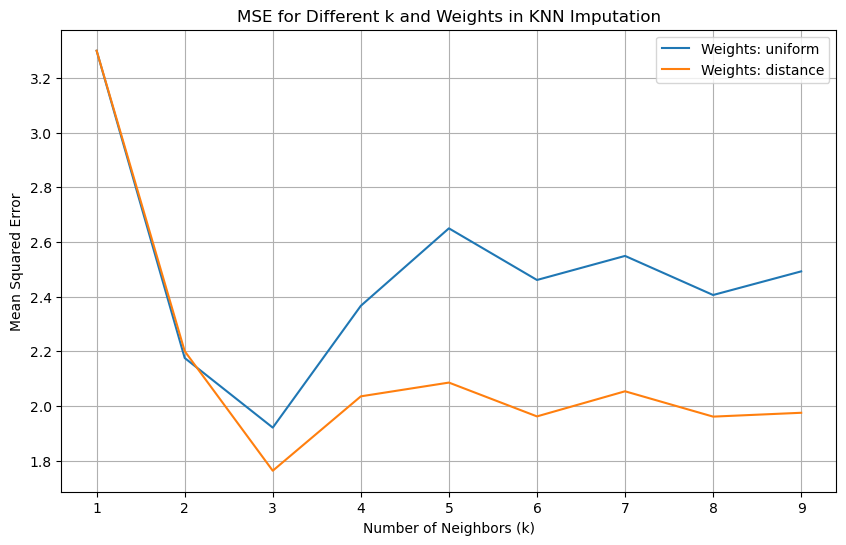

In [293]:
# Identify non-NaN indices in the original 'US' column
non_nan_indices = df_scaled_copy[df_scaled_copy['US'].notna()].index

# Randomly set a few of these non-NaN 'US' values to NaN to serve as a test set
np.random.seed(42)
random_indices = np.random.choice(non_nan_indices, size=3, replace=False)
original_values = df_scaled_copy.loc[random_indices, 'US'].copy()
df_scaled.loc[random_indices, 'US'] = np.nan

mse_results = {'uniform': [], 'distance': []}

# Perform KNN imputation for various k and weights again
for weight in weights_options:
    for k in k_values:
        imputer = KNNImputer(n_neighbors=k, weights=weight)
        df_imputed = imputer.fit_transform(df_scaled)
        df_imputed = pd.DataFrame(df_imputed, columns=df_scaled.columns)
        
        # Calculate MSE for the imputed values
        imputed_values = df_imputed.loc[random_indices, 'US']
        mse = mean_squared_error(original_values, imputed_values)
        mse_results[weight].append(mse)

# Visualization 
plt.figure(figsize=(10, 6))
for weight in weights_options:
    plt.plot(k_values, mse_results[weight], label=f'Weights: {weight}')
    
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error')
plt.title('MSE for Different k and Weights in KNN Imputation')
plt.legend()
plt.grid(True)
plt.show()



In [294]:
# Perform KNN imputation using optimal parameters (k=3 and weights='distance')
optimal_k = 3
optimal_weights = 'distance'

# Initialize the KNN imputer
imputer = KNNImputer(n_neighbors=optimal_k, weights=optimal_weights)

# Perform imputation
df_imputed = imputer.fit_transform(df_scaled)
df_imputed = pd.DataFrame(df_imputed, columns=df_scaled.columns)

In [295]:
# Denormalize the imputed data to get it back to the original scale
df_imputed_denorm = pd.DataFrame(scaler.inverse_transform(df_imputed), columns=df2_KNN.columns)

df2_KNN['US'] = df_imputed_denorm['US']

In [296]:
knn_mean = df2_KNN['US'].mean()
knn_std = df2_KNN['US'].std()

print(f"Mean: {knn_mean}")
print(f"Standard Deviation: {knn_std}")

Mean: 27.136132642157424
Standard Deviation: 22.052776820198268


In our analysis of a small dataset, we found that different imputation methods led to subtle yet meaningful variations in both mean values and standard deviations. The loss of 14 rows due to listwise deletion highlights the cost of underutilizing available data, particularly when data collection is resource-intensive. Mean imputation significantly reduced the standard deviation, potentially misleading us about the attribute's stability. The KNN method introduced its own complexities, such as transforming the other columns and choosing the optimal 'k' selection through cross-validation, emphasizing that the choice of imputation strategy is far from trivial.

In [297]:
df2_US_album = df2_US.copy()

In [298]:
# Repeat the above steps with a factor/string column, this time doing mode imputation instead of mean

# Randomly select 5% of the DataFrame rows since there are no missing values in Album column
sample_indices = np.random.choice(df2_US_album.index, size= math.ceil(0.05 * len(df2_US_album)), replace=False)

# Set the 'Album' value to NaN for the selected rows
df2_US_album.loc[sample_indices, 'Album'] = np.nan

In [299]:
# Find the mode of the factor column
mode_US_album = df2_US_album['Album'].mode()
print(f"Mode: {mode_US_album}")

Mode: 0    I Am... Sasha Fierce
Name: Album, dtype: object


In [300]:
# Use listwise deletion and find the mode again
df2_US_album_clean = df2_US_album.dropna()
mode_value_2 = df2_US_album_clean['Album'].mode()
print(f"Mode: {mode_value_2}")

Mode: 0    I Am... Sasha Fierce
Name: Album, dtype: object


In [301]:
df2_drop = df2_US_album.copy()

# Use mode imputation and find the mode again
print("Before:", df2_drop['Album'].isna().sum())
df2_drop['Album'] = df2_drop['Album'].fillna(mode_US_album[0])
print("After:", df2_drop['Album'].isna().sum())

print(f"Mode: {df2_drop['Album'].mode()}")

Before: 3
After: 0
Mode: 0    I Am... Sasha Fierce
Name: Album, dtype: object


In [302]:
df2_KNN_album = df2_US_album.copy()

In [303]:
#Same KNN process as before - should have made a function for this
df2_KNN_album.drop(['Title'], axis=1, inplace=True)
df2_KNN_album['Certifications'] = df2_KNN_album['Certifications'].apply(lambda x: str(x).count('Platinum') if x is not None else None)
label_encoder = LabelEncoder()
df2_KNN_album['Album'] = label_encoder.fit_transform(df2_KNN_album['Album'])
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df2_KNN_album), columns=df2_KNN_album.columns)

df_scaled.head(13)

,Year,US,Certifications,Album
0,-1.568090,NaN,-1.081684,-1.246039
1,-1.398164,-0.980880,0.954427,-0.384094
2,-1.398164,-0.980880,0.954427,1.856961
3,-1.398164,NaN,-1.081684,1.167405
4,-1.398164,-0.858732,-0.063628,-0.384094
5,-1.398164,NaN,-1.081684,1.167405
6,-1.228238,-0.899448,0.954427,-0.384094
7,-1.228238,NaN,-1.081684,-0.211706
8,-1.058311,NaN,-1.081684,0.995016
9,-1.058311,-0.980880,-0.063628,-1.590816


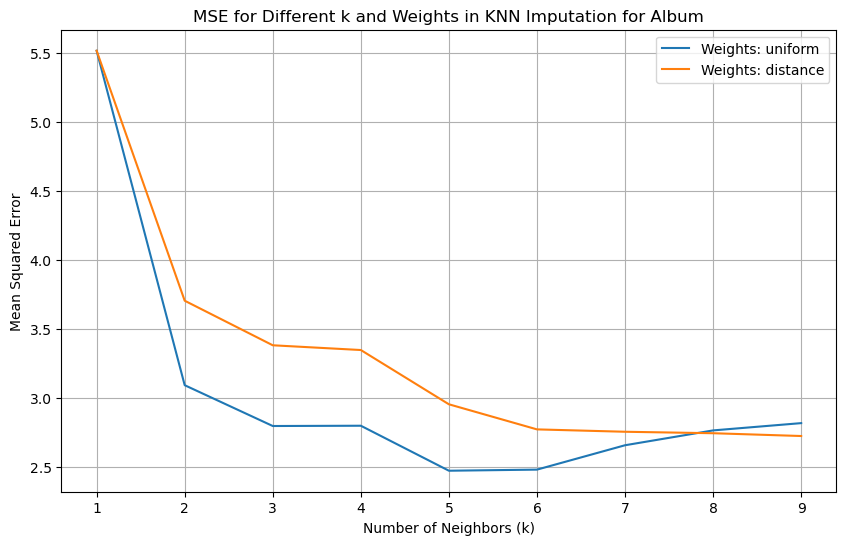

In [304]:
# Identify non-NaN indices in the original 'Album' column
non_nan_indices_album = df_scaled[df_scaled['Album'].notna()].index

np.random.seed(42)
random_indices_album = np.random.choice(non_nan_indices_album, size=3, replace=False)
original_values_album = df_scaled.loc[random_indices_album, 'Album'].copy()
df_scaled.loc[random_indices_album, 'Album'] = np.nan

mse_results_album = {'uniform': [], 'distance': []}

for weight in weights_options:
    for k in k_values:
        imputer = KNNImputer(n_neighbors=k, weights=weight)
        df_imputed = imputer.fit_transform(df_scaled)
        df_imputed = pd.DataFrame(df_imputed, columns=df_scaled.columns)
        
        imputed_values_album = df_imputed.loc[random_indices_album, 'Album']
        mse = mean_squared_error(original_values_album, imputed_values_album)
        mse_results_album[weight].append(mse)

plt.figure(figsize=(10, 6))
for weight in weights_options:
    plt.plot(k_values, mse_results_album[weight], label=f'Weights: {weight}')
    
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error')
plt.title('MSE for Different k and Weights in KNN Imputation for Album')
plt.legend()
plt.grid(True)
plt.show()



In [305]:
df_imputed.head()

,Year,US,Certifications,Album
0,-1.568090,0.089822,-1.081684,0.221394
1,-1.398164,-0.980880,0.954427,-0.384094
2,-1.398164,-0.980880,0.954427,1.856961
3,-1.398164,0.453974,-1.081684,1.167405
4,-1.398164,-0.858732,-0.063628,-0.384094


In [306]:
optimal_k_album = 4
optimal_weights_album = 'uniform'

imputer = KNNImputer(n_neighbors=optimal_k_album, weights=optimal_weights_album)

df_imputed = imputer.fit_transform(df_scaled)
df_imputed = pd.DataFrame(df_imputed, columns=df_scaled.columns)

df_imputed_denorm = pd.DataFrame(scaler.inverse_transform(df_imputed), columns=df_imputed.columns)

In [307]:
# Round the imputed album values to the nearest integer as label encoder uses integers
df_imputed_denorm['Album'] = df_imputed_denorm['Album'].round().astype(int)

# Use inverse_transform to get back to original labels for 'Album'
df_imputed_denorm['Album'] = label_encoder.inverse_transform(df_imputed_denorm['Album'])

# Update the original DataFrame with the imputed 'Album' values
df2_KNN_album['Album'] = df_imputed_denorm['Album']

In [308]:
df2_KNN_album['Album'].mode()

0    I Am... Sasha Fierce
Name: Album, dtype: object

All four techniques we used to fill in missing data pointed to 'I Am... Sasha Fierce' as the most common album. While this might seem to validate the album's significance, using the most common value to fill in missing spots can lead us down the wrong path, especially if we're making assumptions about something as specific as which album a song belongs to. Among the methods we tried, KNN seems most promising because songs from the same album often share similar attributes and production timelines, so KNN is the most contextually aware approach. 